### Welcome to a project analysing and then attempting to Model Big 4 compliance data

In [ ]:
# Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('big4_financial_risk_compliance.csv')

In [3]:
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


df.dtypes

In [5]:
df.shape

(100, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df[df.isna()].count()

Year                         0
Firm_Name                    0
Total_Audit_Engagements      0
High_Risk_Cases              0
Compliance_Violations        0
Fraud_Cases_Detected         0
Industry_Affected            0
Total_Revenue_Impact         0
AI_Used_for_Auditing         0
Employee_Workload            0
Audit_Effectiveness_Score    0
Client_Satisfaction_Score    0
dtype: int64

# Given no null values, and not duplicates, we can get into exploratory analysis as this data is quite clean

In [8]:
df.describe()

,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [10]:
df['Firm_Name'].value_counts()

Firm_Name
Deloitte         30
PwC              25
Ernst & Young    23
KPMG             22
Name: count, dtype: int64

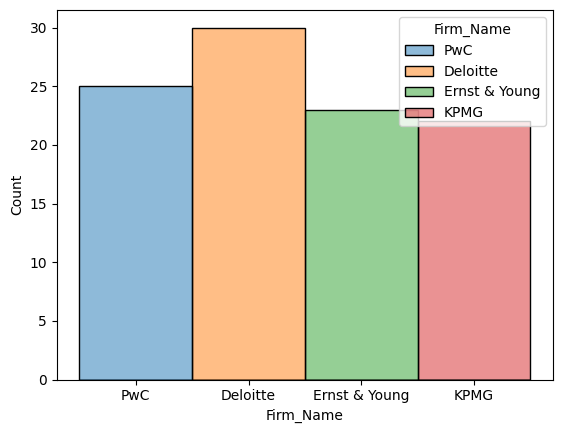

In [11]:
sns.histplot(data=df, x="Firm_Name", hue='Firm_Name')
plt.show()

                               Year  Total_Audit_Engagements  High_Risk_Cases  \
Year                       1.000000                 0.074125         0.053115   
Total_Audit_Engagements    0.074125                 1.000000         0.034309   
High_Risk_Cases            0.053115                 0.034309         1.000000   
Compliance_Violations      0.072821                 0.106111        -0.030904   
Fraud_Cases_Detected       0.133996                 0.267385         0.122829   
Total_Revenue_Impact       0.197986                -0.047823        -0.006465   
Employee_Workload         -0.060485                -0.199313        -0.009775   
Audit_Effectiveness_Score  0.085397                 0.035934         0.104043   
Client_Satisfaction_Score -0.016865                -0.142463        -0.039145   

                           Compliance_Violations  Fraud_Cases_Detected  \
Year                                    0.072821              0.133996   
Total_Audit_Engagements                 0

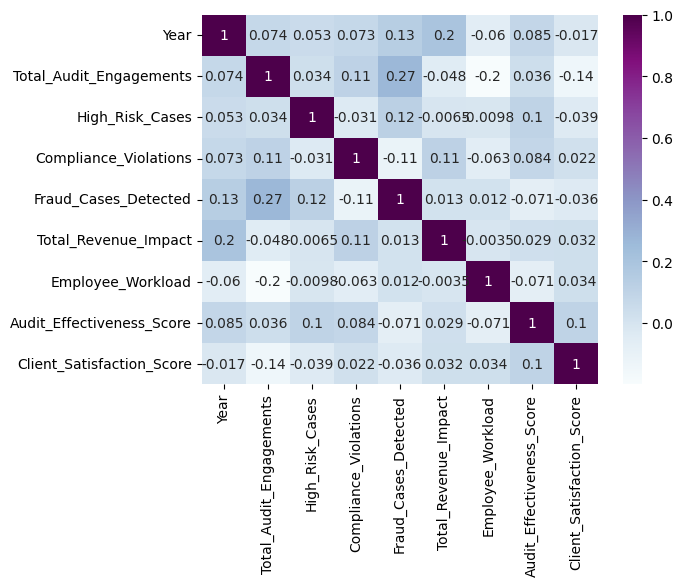

In [12]:
co_mtx = df.corr(numeric_only=True)

# Print correlation matrix
print(co_mtx)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap='BuPu', annot=True)

# Display heatmap
plt.show()

## There don't seem to be any meaningful relationships between the variables, now lets look at histograms of each variable by firm

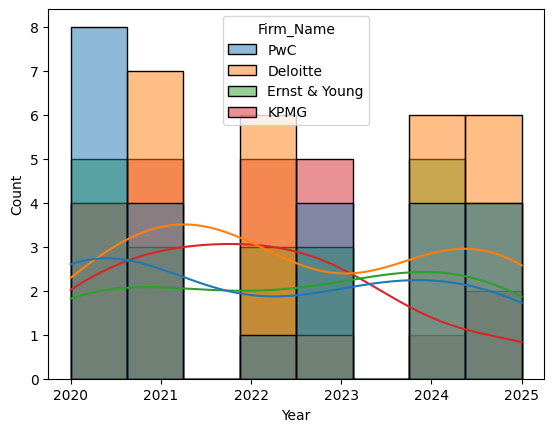

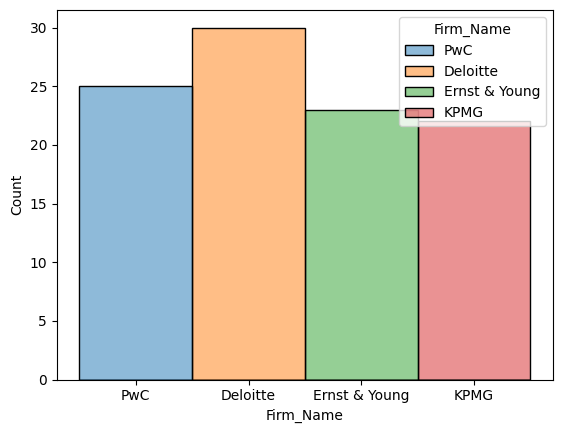

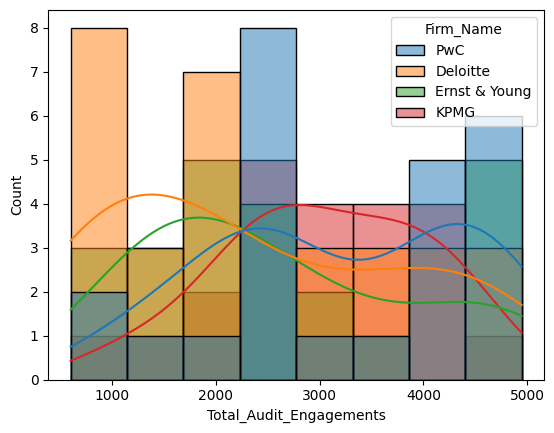

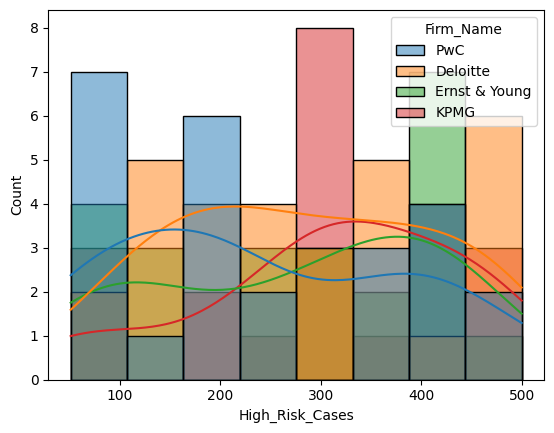

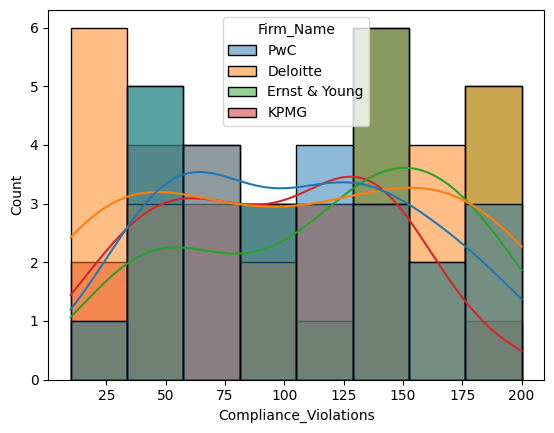

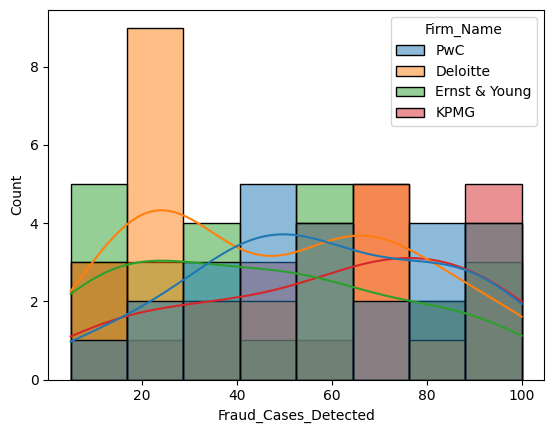

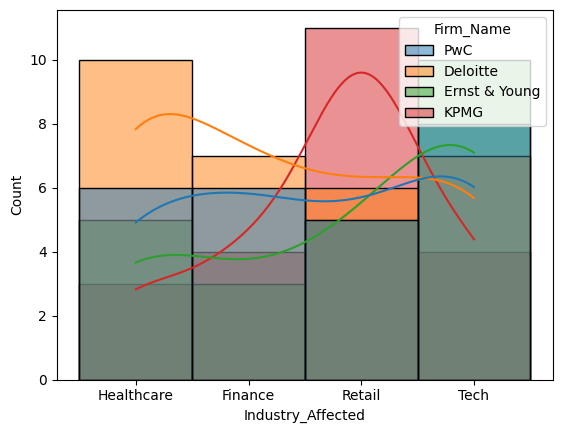

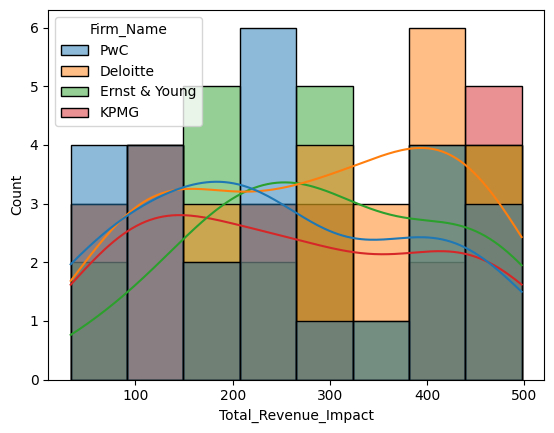

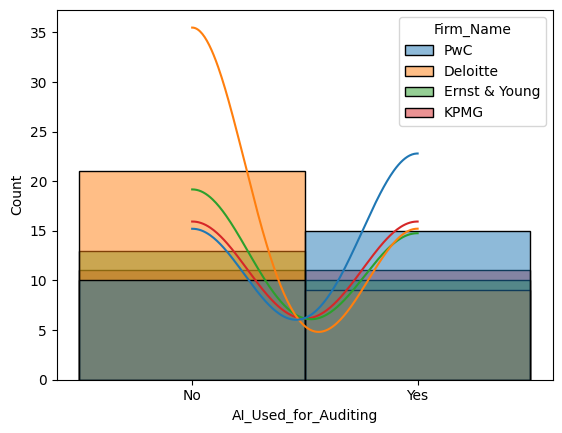

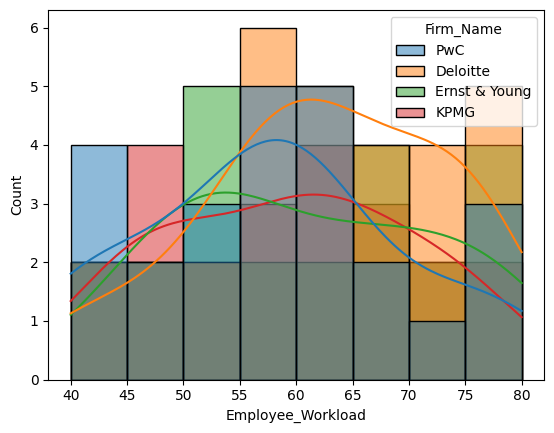

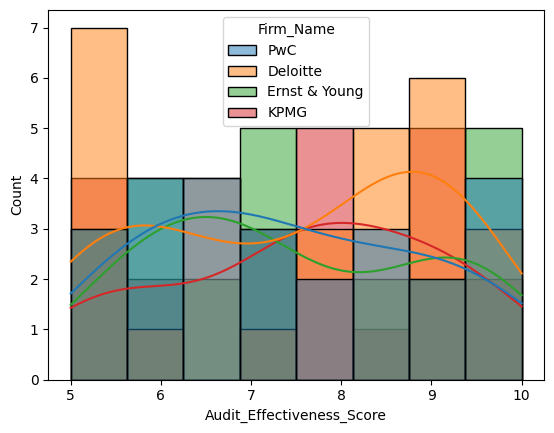

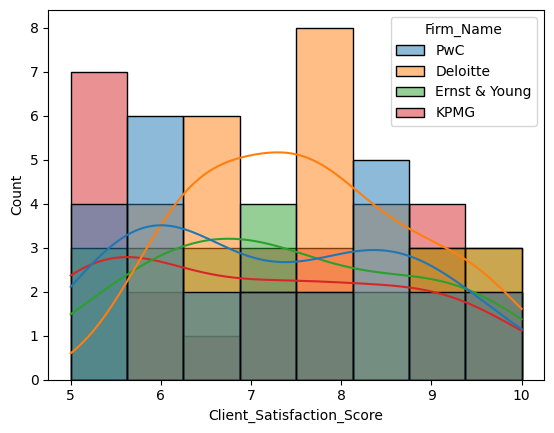

In [13]:
for col in df:
    sns.histplot(x=col,data=df,kde=True, hue='Firm_Name')
    plt.show()


Text(0, 0.5, 'Avg Client Satisfaction Score')

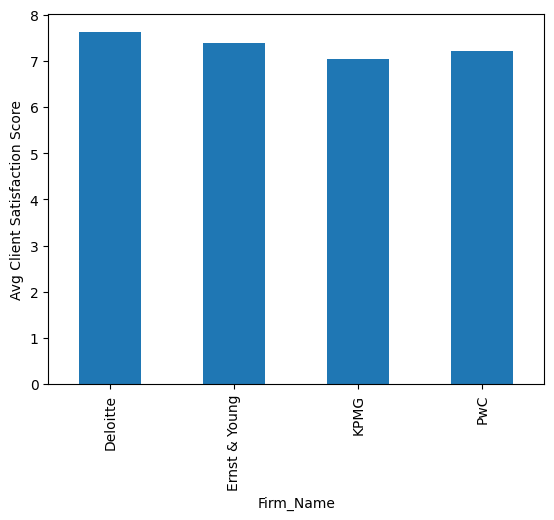

In [14]:
ax = df.groupby(by=['Firm_Name'])['Client_Satisfaction_Score'].mean().plot.bar(legend=False)
ax.set_ylabel("Avg Client Satisfaction Score")

Looks like Deloitte had the highest client satisfaction on average, while KPMG had the lowest

Text(0, 0.5, 'Avg Audit Effectiveness Score')

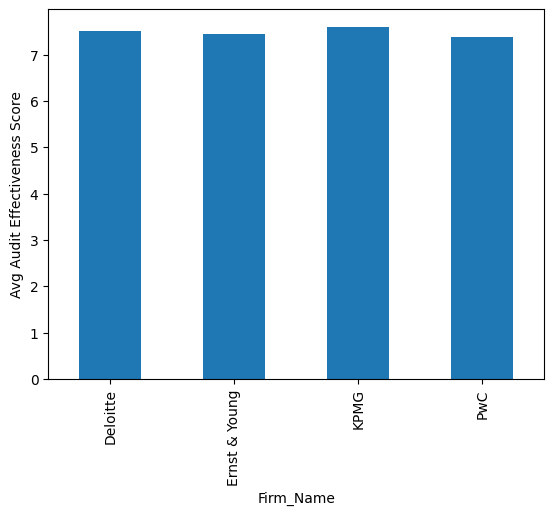

In [15]:
ax = df.groupby(by=['Firm_Name'])['Audit_Effectiveness_Score'].mean().plot.bar(legend=False)
ax.set_ylabel("Avg Audit Effectiveness Score")

Funnily enough, it looks like KPMG had the highest Audit effectiveness score, while PWC had the lowest. How was this calculated?

Text(0, 0.5, 'Total High Risk Cases')

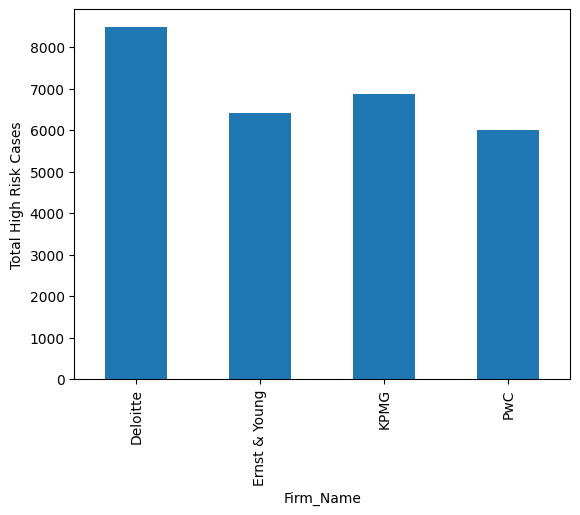

In [16]:
ax = df.groupby(by=['Firm_Name'])['High_Risk_Cases'].sum().plot.bar(legend=False)
ax.set_ylabel("Total High Risk Cases")

Text(0, 0.5, 'Total_Audit_Engagements')

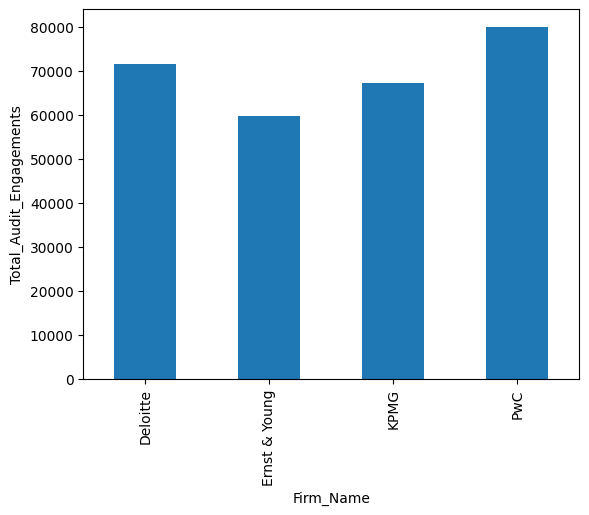

In [17]:
ax = df.groupby(by=['Firm_Name'])['Total_Audit_Engagements'].sum().plot.bar(legend=False)
ax.set_ylabel('Total_Audit_Engagements')

Text(0, 0.5, 'Fraud_Cases_Detected')

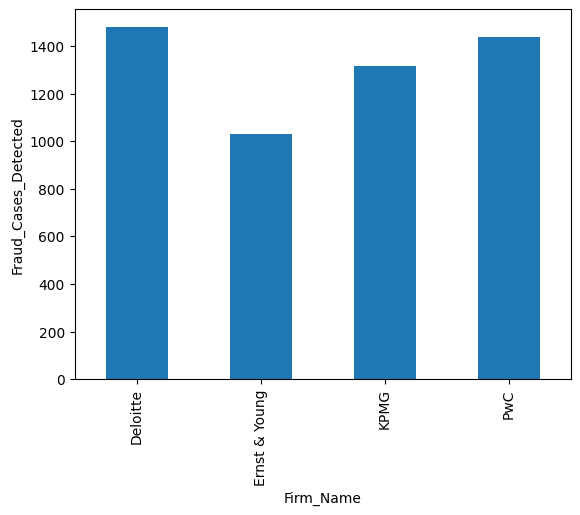

In [18]:
ax = df.groupby(by=['Firm_Name'])['Fraud_Cases_Detected'].sum().plot.bar(legend=False)
ax.set_ylabel('Fraud_Cases_Detected')

Text(0, 0.5, 'Compliance_Violations')

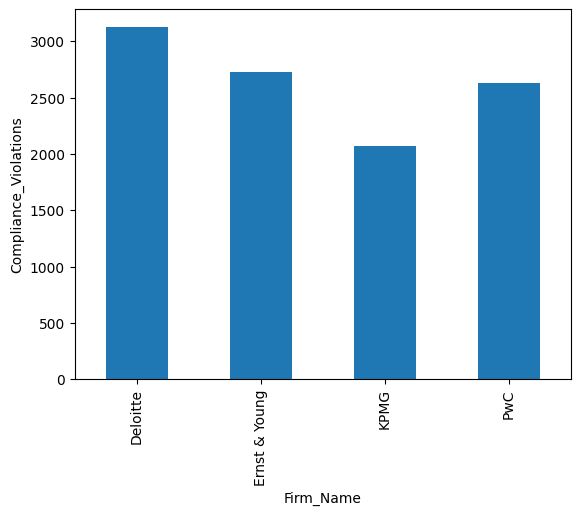

In [19]:
ax = df.groupby(by=['Firm_Name'])['Compliance_Violations'].sum().plot.bar(legend=False)
ax.set_ylabel('Compliance_Violations')

The following process was first attempted with Audit Effectiveness as the target, but no rsquared values above 0.2 were found in any test, so I tried with client satisfaction


Variance Inflation Factors:
                     Feature        VIF
0  Audit_Effectiveness_Score  18.064045
1    Total_Audit_Engagements   6.096015
2            High_Risk_Cases   5.256728
3      Compliance_Violations   4.779554
4       Fraud_Cases_Detected   4.977710
5       Total_Revenue_Impact   4.773680
6          Employee_Workload  16.063397
R² Score: -0.1955
Mean Absolute Error (MAE): 1.4507
Mean Squared Error (MSE): 2.7742


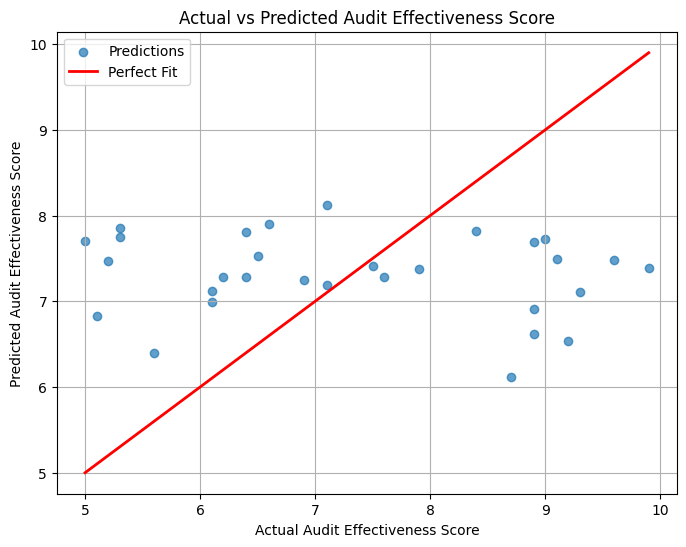

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define feature set and target variable

# features = ['Total_Audit_Engagements', 'High_Risk_Cases', 'Compliance_Violations',
#            'Fraud_Cases_Detected', 'Total_Revenue_Impact', 'Employee_Workload', 'Client_Satisfaction_Score']
# Removed potential data leakage columns: 
features = ['Audit_Effectiveness_Score', 'Total_Audit_Engagements', 'High_Risk_Cases', 'Compliance_Violations',
            'Fraud_Cases_Detected', 'Total_Revenue_Impact', 'Employee_Workload']
target = 'Client_Satisfaction_Score'

# Prepare the data
X = df[features].copy()
y = df[target].copy()

# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Splitting the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# Instantiate and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Visualizing true vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.xlabel('Actual Audit Effectiveness Score')
plt.ylabel('Predicted Audit Effectiveness Score')
plt.title('Actual vs Predicted Audit Effectiveness Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Perfect Fit")
plt.legend()
plt.grid(True)
plt.show()


array([[<Axes: xlabel='Audit_Effectiveness_Score', ylabel='Audit_Effectiveness_Score'>,
        <Axes: xlabel='Total_Audit_Engagements', ylabel='Audit_Effectiveness_Score'>,
        <Axes: xlabel='High_Risk_Cases', ylabel='Audit_Effectiveness_Score'>,
        <Axes: xlabel='Compliance_Violations', ylabel='Audit_Effectiveness_Score'>,
        <Axes: xlabel='Fraud_Cases_Detected', ylabel='Audit_Effectiveness_Score'>,
        <Axes: xlabel='Total_Revenue_Impact', ylabel='Audit_Effectiveness_Score'>,
        <Axes: xlabel='Employee_Workload', ylabel='Audit_Effectiveness_Score'>],
       [<Axes: xlabel='Audit_Effectiveness_Score', ylabel='Total_Audit_Engagements'>,
        <Axes: xlabel='Total_Audit_Engagements', ylabel='Total_Audit_Engagements'>,
        <Axes: xlabel='High_Risk_Cases', ylabel='Total_Audit_Engagements'>,
        <Axes: xlabel='Compliance_Violations', ylabel='Total_Audit_Engagements'>,
        <Axes: xlabel='Fraud_Cases_Detected', ylabel='Total_Audit_Engagements'>,
        

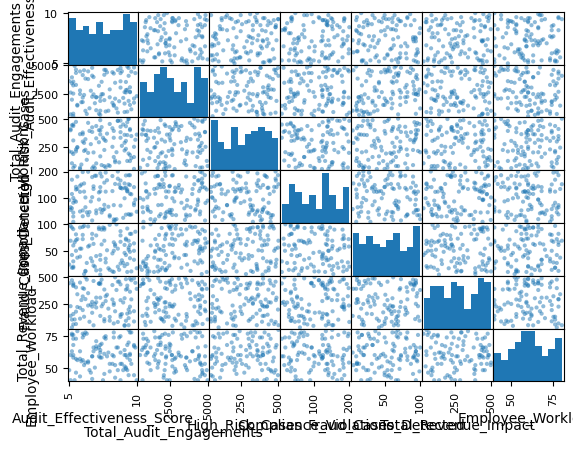

In [26]:
(pd.plotting.scatter_matrix(df[features]))

R² Score: -0.1862
Mean Absolute Error (MAE): 1.4144
Mean Squared Error (MSE): 2.7330


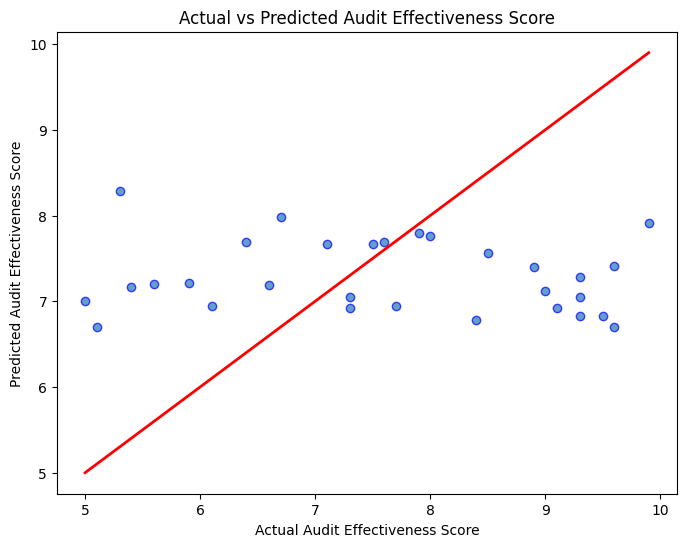

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define features and target
features = ['Audit_Effectiveness_Score', 'Total_Audit_Engagements', 'High_Risk_Cases', 'Compliance_Violations',
            'Fraud_Cases_Detected', 'Total_Revenue_Impact', 'Employee_Workload']
target = 'Client_Satisfaction_Score'

# Prepare the data
X = df[features]
y = df[target]

# Split into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Instantiate Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Visualizing Actual vs. Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='b')
plt.xlabel('Actual Audit Effectiveness Score')
plt.ylabel('Predicted Audit Effectiveness Score')
plt.title('Actual vs Predicted Audit Effectiveness Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()

In [32]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features (SVR works best with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model
svr.fit(X_train_scaled, y_train)

# Predict
y_pred = svr.predict(X_test_scaled)

# Evaluate
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')

R² Score: -0.5658
MAE: 1.5831
MSE: 3.6077


In [33]:
import xgboost as xgb

# Instantiate the model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print(f'R² Score: {r2_score(y_test, y_pred):.4f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')

R² Score: -0.1756
MAE: 1.3307
MSE: 2.7088


## Seemingly none of these models are doing a good job at predicting the Client Satisfaction Score - This makes me ask the question if other factors could have lead impacted this score

## I attempted removing a few variables, and trying different combinations, but there doesn't seem to be a good combination of varaibles that explain this score either. It likely is not in the dataset